# TPC1: Análise de dados: doença cardíaca

Descarregue o ficheiro de dados: `myheart.csv`
Crie um programa em Python, conjunto de funções, que responda às seguintes questões:
* Crie uma função que lê a informação do ficheiro para um modelo, previamente pensado em memória;
* Pense num modelo para guardar uma distribuição;
* Crie uma função que calcula a distribuição da doença por sexo;
* Crie uma função que calcula a distribuição da doença por escalões etários. Considere os seguintes escalões: [30-34], [35-39], [40-44], ...
* Crie uma função que calcula a distribuição da doença por níveis de colesterol. Considere um nível igual a um intervalo de 10 unidades, comece no limite inferior e crie os níveis necessários até abranger o limite superior;
* Crie uma função que imprime na forma de uma tabela uma distribuição;
* Especifique um programa que ao executar apresenta as tabelas correspondentes às distribuições pedidas;
* Extra: explore o módulo matplotlib e crie gráficos para as suas distribuições.


              Distribution by gender              
----------------------------------------------------
Gender      |Sick        |Not Sick    |Total       |
----------------------------------------------------
Female      |40          |129         |169         |
Male        |428         |242         |670         |
Total       |468         |371         |839         |
----------------------------------------------------
                         

            Distribution by age group             
----------------------------------------------------
Age Group   |Sick        |Not Sick    |Total       |
----------------------------------------------------
[025,029]   |0           |4           |4           |
[030,034]   |6           |11          |17          |
[035,039]   |19          |34          |53          |
[040,044]   |27          |61          |88          |
[045,049]   |51          |56          |107         |
[050,054]   |83          |85          |168         |
[055,059]   |114      

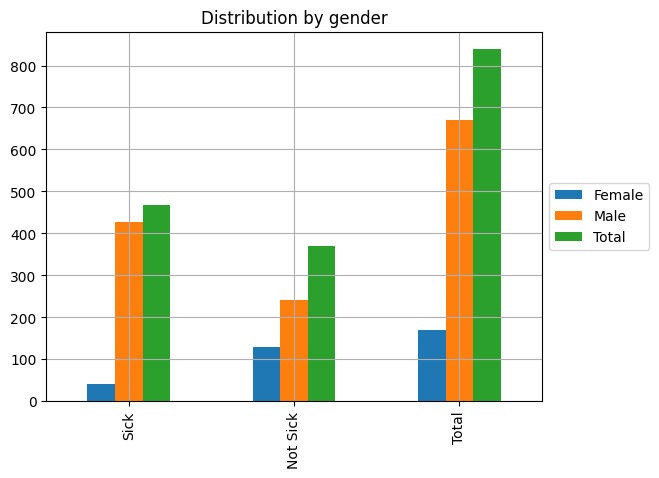

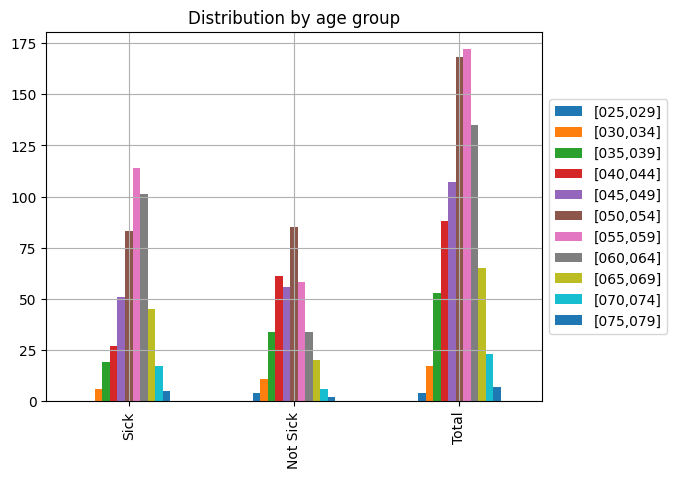

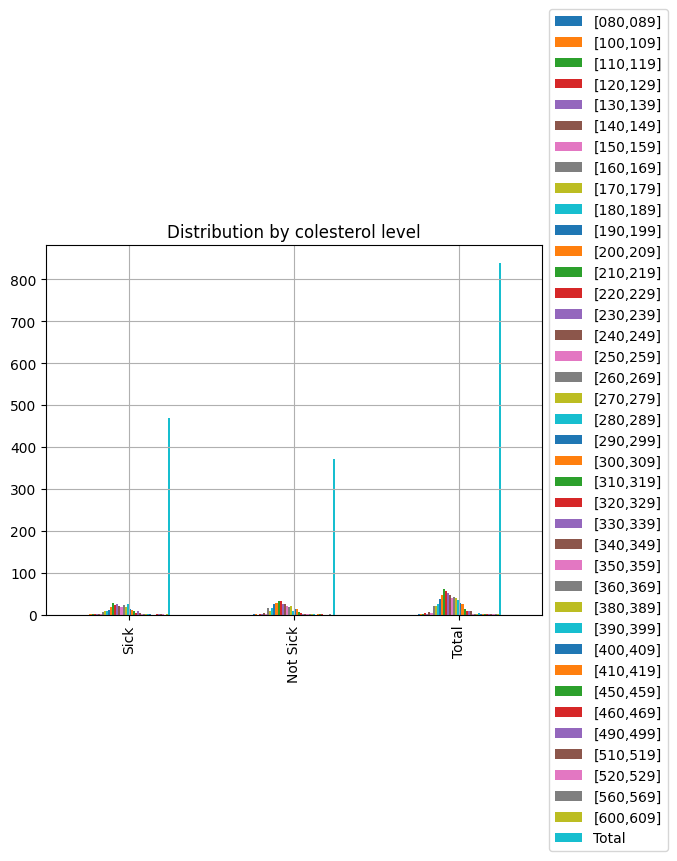

In [9]:
# Using only python standard library

# pandas and matplotlib are only being used to plot the data.
import matplotlib.pyplot as plt
import pandas as pd

# The dataset is stored in a list of dictionaries.
dataset:list[dict] = []


# Dictionaries are used to store the data for the distributions in memory. (global because I didn't want to pass them as parameters to the functions)
sick_data_gender:dict = {"Sick":{"Female":0,"Male":0,"Total":0}}
not_sick_data_gender:dict = {"Not Sick":{"Female":0,"Male":0,"Total":0}}
total_data_gender:dict = {"Total":{"Female":0,"Male":0,"Total":0}}

sick_data_age:dict = {"Sick":{}}
not_sick_data_age:dict = {"Not Sick":{}}
total_data_age:dict = {"Total":{}}

sick_data_colesterol:dict = {"Sick":{}}
not_sick_data_colesterol:dict = {"Not Sick":{}}
total_data_colesterol:dict = {"Total":{}}


# Function to read the dataset from a csv file.
def read_dataset(filename:str) -> list[dict]:
    with open(filename, 'r') as f:
        # The first line of the file must contain the header otherwise the data will be read and stored incorrectly.
        header:list[str] = f.readline().strip().split(',')
        for line in f:
            line:str = line.strip().split(',')
            dataset.append({header[i]: line[i] for i in range(len(header))})
    return dataset

# Function to get the distribution of the disease by gender.
def dist_by_gender() -> dict:
    sick_dataset:list[dict[str,str]] = [data for data in dataset if data["temDoença"] == "1"]
    not_sick_dataset:list[dict[str,str]] = [data for data in dataset if data["temDoença"] == "0"]
    
    total_data_gender["Total"]["Total"]:int = len(dataset)
    total_data_gender["Total"]["Female"]:int = len([data for data in dataset if data["sexo"] == "F"])
    total_data_gender["Total"]["Male"]:int = len([data for data in dataset if data["sexo"] == "M"])
    sick_data_gender["Sick"]["Total"]:int = len(sick_dataset)
    not_sick_data_gender["Not Sick"]["Total"]:int = len(not_sick_dataset)
    sick_data_gender["Sick"]["Female"]:int = len([data for data in sick_dataset if data["sexo"] == "F"])
    not_sick_data_gender["Not Sick"]["Female"]:int = len([data for data in not_sick_dataset if data["sexo"] == "F"])
    sick_data_gender["Sick"]["Male"]:int = len([data for data in sick_dataset if data["sexo"] == "M"])
    not_sick_data_gender["Not Sick"]["Male"]:int = len([data for data in not_sick_dataset if data["sexo"] == "M"])

    return {"Sick":sick_data_gender["Sick"], "Not Sick":not_sick_data_gender["Not Sick"], "Total":total_data_gender["Total"]}


# Function to get the age groups.
def get_ages() -> list[tuple[int,int]]:
    intervals:list[int] = list(range(0, 100, 5))
    age_group:list[tuple[int,int]] = [(i,j-1) for i,j in zip(intervals, intervals[1:])]
    return age_group


# Function to get the distribution of the disease by age group.
def dist_by_age() -> dict:
    age_group:list[tuple[int,int]] = get_ages()

    sick_dataset:list[dict[str,str]] = [data for data in dataset if data["temDoença"] == "1"]
    not_sick_dataset:list[dict[str,str]] = [data for data in dataset if data["temDoença"] == "0"]

    for person in dataset:
        for bot,top in age_group:
            key:str = f"[{bot:03},{top:03}]"
            age:int = int(person["idade"])
            sick:str = person["temDoença"]
            if age >= bot and age <= top:
                if key not in total_data_age["Total"]:
                    total_data_age["Total"][key]:int = 0
                if key not in sick_data_age["Sick"]:
                    sick_data_age["Sick"][key]:int = 0
                if key not in not_sick_data_age["Not Sick"]:
                    not_sick_data_age["Not Sick"][key]:int = 0
                if sick == "1":
                    sick_data_age["Sick"][key] += 1
                else:
                    not_sick_data_age["Not Sick"][key] += 1
                total_data_age["Total"][key] += 1
                break

    sick_data_age["Sick"] = dict(sorted(sick_data_age["Sick"].items()))
    not_sick_data_age["Not Sick"] = dict(sorted(not_sick_data_age["Not Sick"].items()))

    key:str = "Total"
    sick_data_age["Sick"][key]:int = len(sick_dataset)
    not_sick_data_age["Not Sick"][key]:int = len(not_sick_dataset)
    total_data_age["Total"][key]:int = len(dataset)

    return {"Sick":sick_data_age["Sick"], "Not Sick":not_sick_data_age["Not Sick"], "Total":total_data_age["Total"]}


# Function to get the colesterol groups.
def get_colesteroles() -> list[tuple[int,int]]:
    intervals:list[int] = list(range(0, 700, 10))
    colesterol:list[tuple[int,int]] = []
    colesterol = [(i,j-1) for i,j in zip(intervals, intervals[1:])]
    return colesterol


# Function to get the distribution of the disease by colesterol group.
def dist_by_colesterol() -> dict:
    colesterols:list[tuple[int,int]] = get_colesteroles()

    sick_dataset:list[dict[str,str]] = [data for data in dataset if data["temDoença"] == "1"]
    not_sick_dataset:list[dict[str,str]] = [data for data in dataset if data["temDoença"] == "0"]

    for person in dataset:
        for bot,top in colesterols:
            key:str = f"[{bot:03},{top:03}]"
            colesterol:int = int(person["colesterol"])
            sick:str = person["temDoença"]
            if colesterol >= bot and colesterol <= top and colesterol != 0:
                if key not in total_data_colesterol["Total"]:
                    total_data_colesterol["Total"][key]:int = 0
                if key not in sick_data_colesterol["Sick"]:
                    sick_data_colesterol["Sick"][key]:int = 0
                if key not in not_sick_data_colesterol["Not Sick"]:
                    not_sick_data_colesterol["Not Sick"][key]:int = 0
                if sick == "1":
                    sick_data_colesterol["Sick"][key] += 1
                else:
                    not_sick_data_colesterol["Not Sick"][key] += 1
                total_data_colesterol["Total"][key] += 1
                break

    sick_data_colesterol["Sick"] = dict(sorted(sick_data_colesterol["Sick"].items()))
    not_sick_data_colesterol["Not Sick"] = dict(sorted(not_sick_data_colesterol["Not Sick"].items()))

    key:str = "Total"
    sick_data_colesterol["Sick"][key]:int = len(sick_dataset)
    not_sick_data_colesterol["Not Sick"][key]:int = len(not_sick_dataset)
    total_data_colesterol["Total"][key]:int = len(dataset)

    return {"Sick":sick_data_colesterol["Sick"], "Not Sick":not_sick_data_colesterol["Not Sick"], "Total":total_data_colesterol["Total"]}


# Function that transforms a Specific Dictionary Format to a Table.
def table(data:dict,scale:str = "",title:str = "",extra:str="") -> None:
    header:str = ""
    keys:list[str] = [scale]
    keys += data.keys()
    for key in keys:
        header += f"{key:<12}|"
    lines:list[str] = data[keys[1]].keys()
    print(f"\n{title:^50}")
    print("-"*len(header))
    print(header)
    print("-"*len(header))
    body:str = ""
    for line in lines:
        body += f"{line:<12}|"
        for column in data.keys():
            body += f"{data[column][line]:<12}|"
        body += "\n"
    body += f"{'-'*len(header)}\n"
    body += f"{extra:^25}"
    print(body)


# Function that plots a bar chart.
def plot_bar(data:dict,pop:bool=False, title:str = "") -> None:
    if pop:
        for d in data.values():
            d.pop('Total', None)
    pd.DataFrame(data).T.plot(kind='bar')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.title(title)
    plt.show()


# Main function.
def main():
    read_dataset('myheart.csv')
    dist_gender:dict = dist_by_gender()
    dist_age:dict = dist_by_age()
    dist_colesterol:dict = dist_by_colesterol()
    table(dist_gender,scale="Gender",title="Distribution by gender")
    table(dist_age,scale="Age Group",title="Distribution by age group")
    table(dist_colesterol,scale="Colesterol",title="Distribution by colesterol level*",extra="*Excluding 0 values")
    plot_bar(dist_gender,title="Distribution by gender")
    plot_bar(dist_age,pop=True,title="Distribution by age group")
    plot_bar(dist_colesterol,pop=True,title="Distribution by colesterol level")


if __name__ == '__main__':
    main()
